In [46]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
%matplotlib inline

In [47]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
exam = pd.read_csv(data_path, delimiter = ',')
exam.head(10)
exam.dtypes

revision_time    float64
exam_score       float64
dtype: object

In [48]:
#1a.
#Look at data
print('Number of samples: {}, number of attributes: {}'.format(exam.shape[0], exam.shape[1]))
#exam.describe()
print(exam.max(0))
print(exam.min(0))

Number of samples: 50, number of attributes: 2
revision_time    48.011
exam_score       94.945
dtype: float64
revision_time     2.723
exam_score       14.731
dtype: float64


In [49]:
94.945 - 14.731

80.214

In [50]:
#1b.
x = exam['revision_time'].as_matrix().reshape(-1,1)
y = exam['exam_score'].as_matrix()
#a = np.ones((50))
#b = (a,x)
#X = np.column_stack(b) #returns 2,50 array but without the reshape part
X = np.hstack((np.ones((50,1)), x))
print(X.shape)
print(X)


(50, 2)
[[ 1.     2.723]
 [ 1.     2.844]
 [ 1.     3.303]
 [ 1.     3.588]
 [ 1.     4.05 ]
 [ 1.     4.08 ]
 [ 1.     5.674]
 [ 1.     6.06 ]
 [ 1.     6.347]
 [ 1.     6.819]
 [ 1.     7.098]
 [ 1.     7.515]
 [ 1.     8.356]
 [ 1.     9.214]
 [ 1.    10.364]
 [ 1.    10.51 ]
 [ 1.    12.102]
 [ 1.    13.187]
 [ 1.    16.692]
 [ 1.    16.977]
 [ 1.    18.33 ]
 [ 1.    19.599]
 [ 1.    20.321]
 [ 1.    21.28 ]
 [ 1.    21.578]
 [ 1.    21.798]
 [ 1.    22.048]
 [ 1.    24.949]
 [ 1.    25.147]
 [ 1.    26.495]
 [ 1.    26.535]
 [ 1.    28.687]
 [ 1.    29.055]
 [ 1.    31.043]
 [ 1.    32.176]
 [ 1.    32.203]
 [ 1.    32.226]
 [ 1.    32.268]
 [ 1.    32.711]
 [ 1.    32.886]
 [ 1.    34.489]
 [ 1.    34.889]
 [ 1.    37.299]
 [ 1.    40.875]
 [ 1.    41.249]
 [ 1.    45.213]
 [ 1.    45.397]
 [ 1.    46.923]
 [ 1.    47.818]
 [ 1.    48.011]]


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#1b.
lr = LinearRegression(fit_intercept=False, copy_X=True)
lr.fit(X, y)
print('Training accuracy: {:.3f}'.format(lr.score(X, y)))
print(lr.coef_)
print(lr.intercept_)
# y = 1.44114091x + 17.89768026?


Training accuracy: 0.928
[17.89768026  1.44114091]
0.0


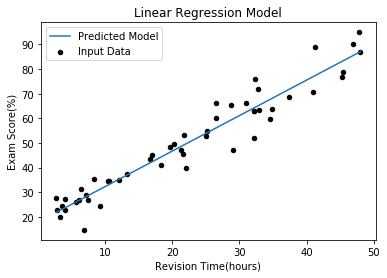

In [52]:
#1c.
plt.title('Linear Regression Model')
plt.scatter(x, y,s=20, color='k', label='Input Data')
plt.xlabel('Revision Time(hours)')
plt.ylabel('Exam Score(%)')
plt.plot(x, lr.predict(X), label='Predicted Model')
plt.legend()


In [53]:
#1d.
X_t = np.transpose(X)
para = (np.dot(np.linalg.inv(np.dot(X_t, X)), np.dot(X_t, y)))
Y = para[1]*x+para[0]
print(para)
#plt.title('Closed form solution model')
#plt.scatter(x, y, label='Actual points')
#plt.xlabel('Revision Time')
#plt.ylabel('Exam Score')
#plt.plot(x, Y,color='k') #is this right way to display fitted linear model?


[17.89768026  1.44114091]


In [54]:
#1f.
MSE1 = mean_squared_error(y, lr.predict(X))
MSE2 = mean_squared_error(y, Y)
print(MSE1)
print(MSE2)

30.9854726145413
30.985472614541287


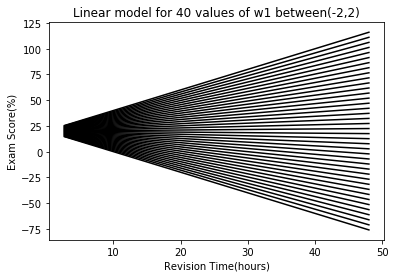

In [58]:
#1g.
w0 = 20 #y-intercept ?
w1 = np.linspace(-2,2,40) #gradient?
w = [w0,w1]
for val in w1:
    line = val*x+w[0]
    plt.plot(x, line, color='k')
    plt.title('Linear model for 40 values of w1 between(-2,2)')
    plt.xlabel('Revision Time(hours)')
    plt.ylabel('Exam Score(%)')
    #MSE2 = mean_squared_error(y, line)
    #print('{:.3f} & {:.2f} \\\\'.format(val, MSE2))

# Question 2

In [59]:
data_path2 = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
nonL = pd.read_csv(data_path2, delimiter = ',')
#nonL.head(10)
#print('Number of samples: {}, number of attributes: {}'.format(nonL.shape[0], nonL.shape[1]))
#exam.describe()

In [60]:
x = nonL['input'].as_matrix().reshape(-1, 1)
y = nonL['output'].as_matrix().reshape(-1, 1)
idx = np.unravel_index(np.argsort(x, axis=0), x.shape)
x = x[idx]
y = y[idx]
#poly = PolynomialFeatures(2)
#X = poly.fit_transform(x)


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


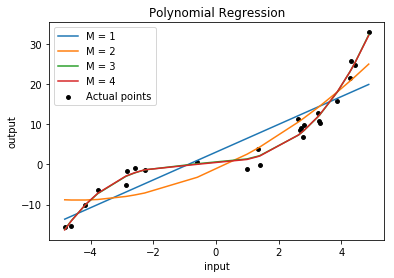

In [61]:
#2a.
plt.title('Polynomial Regression')
plt.scatter(x, y, s=15, color='black', label='Actual points')
plt.xlabel('input')
plt.ylabel('output')
for i in range(1, 5):
    poly = PolynomialFeatures(i)
    X = poly.fit_transform(x)
    lr = LinearRegression(fit_intercept=False, copy_X=True)
    lr.fit(X, y)
    plt.plot(x, lr.predict(X), label='M = {}'.format(i))
    plt.legend()
    


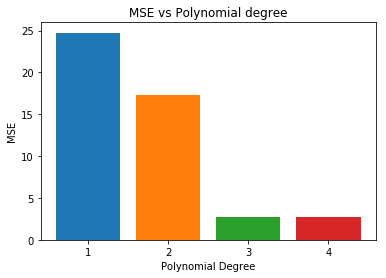

In [62]:
#2b.
plt.title('MSE vs Polynomial degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
for i in range(1, 5):
    poly = PolynomialFeatures(i)
    X = poly.fit_transform(x)
    lr = LinearRegression(fit_intercept=False, copy_X=True)
    lr.fit(X, y)
    MSE = mean_squared_error(y, lr.predict(X))
    plt.bar(i, MSE)
    plt.xticks([1,2,3,4])


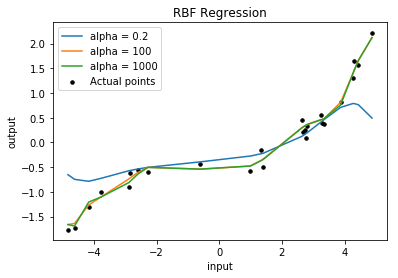

In [66]:
#2d.
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

plt.scatter(x, y, s=12, color='black', label='Actual points')
alpha = [0.2,100,1000]
for v in alpha:
    svr_rbf = SVR(kernel='rbf', C=v)
    svr_rbf.fit(X,y)
    plt.title('RBF Regression')
    plt.xlabel('input')
    plt.ylabel('output')
    plt.plot(x, svr_rbf.predict(X), label='alpha = {}'.format(v))
    plt.legend()


# Question 3

In [7]:
# Load the dataset
data_path_test = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
test = pd.read_csv(data_path_test, delimiter = ',')

data_path_train = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
train = pd.read_csv(data_path_train, delimiter = ',')

#full data without smiling column
test_clean = test.copy(deep=True)
test_clean=test_clean.drop('smiling', axis=1)
train_clean = train.copy(deep=True)
train_clean=train_clean.drop('smiling', axis=1)

print('Number of  train samples: {}, number of train attributes: {}'.format(train.shape[0], train.shape[1]-1))
print('Number of test samples: {}, number of test attributes: {}'.format(test.shape[0], test.shape[1]-1))

train.describe()
#print(train.shape, "train")
#print(test.shape, "test")
#print(test.head(3))
#test

Number of  train samples: 4800, number of train attributes: 136
Number of test samples: 1200, number of test attributes: 136


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-1.931962,1.455752,-1.920338,1.004314,-1.858298,0.545549,-1.744761,0.089065,-1.550913,-0.333587,...,-0.111277,0.687324,-0.106768,0.223960,-0.263222,0.005834,-0.288294,-0.211278,-0.269045,0.486458
std,0.590181,0.402155,0.552056,0.380052,0.532371,0.361070,0.523245,0.343751,0.491355,0.321495,...,0.050815,0.209837,0.148709,0.086788,0.148332,0.073380,0.147636,0.083300,0.148305,0.499869
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.071000,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.000000
25%,-2.241000,1.247750,-2.204000,0.812750,-2.142250,0.361750,-2.039250,-0.086000,-1.839000,-0.505000,...,-0.142000,0.582000,-0.191000,0.188000,-0.356000,-0.024000,-0.383000,-0.252000,-0.361000,0.000000
50%,-1.952000,1.456000,-1.931000,1.011000,-1.854000,0.561000,-1.751000,0.104000,-1.576500,-0.319000,...,-0.110000,0.701000,-0.102000,0.224000,-0.242000,0.000000,-0.266000,-0.213000,-0.247000,0.000000
75%,-1.628750,1.676000,-1.626000,1.212250,-1.557750,0.750000,-1.451000,0.285250,-1.276000,-0.141000,...,-0.078000,0.823250,-0.018000,0.266000,-0.147000,0.035250,-0.169000,-0.175000,-0.152000,1.000000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.655000,2.296000,...,0.288000,1.387000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,1.000000


In [8]:
#split data into smiling and non smiling
train_smile = train[train['smiling']==1]
train_nsmile = train[train['smiling']==0]

#split data without smiling column
train_smile_clean = train_smile.copy(deep=True)
train_smile_clean = train_smile_clean.drop('smiling', axis=1)

train_nsmile_clean = train_nsmile.copy(deep=True)
train_nsmile_clean = train_nsmile_clean.drop('smiling', axis=1)

smile = train_nsmile_clean.as_matrix()
nsmile = train_smile_clean.as_matrix()


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [9]:
#3b.
def avg(data):
    noOfPoints = data.shape[1]/2

    averages = []#list to hold average x and y coordinates for each attribute
    for attribute in data:
        rowAvg = []
        xSum = 0
        ySum = 0
        for i in range(0,data.shape[1]):
            if i % 2 == 0:
                xSum += attribute[i]
            if i % 2 == 1:
                ySum += attribute[i]
        xAvg = xSum / noOfPoints
        yAvg = ySum / noOfPoints
        rowAvg.append(xAvg)
        rowAvg.append(yAvg)
        averages.append(rowAvg)
    return averages

In [10]:
#3b.
smile_avg = avg(smile)
nsmile_avg = avg(nsmile)
xs = []
ys = []
for entry in smile_avg:
    xs.append(entry[0])
    ys.append(entry[1])
    
xns = []
yns = []
for entry in nsmile_avg:
    xns.append(entry[0])
    yns.append(entry[1])

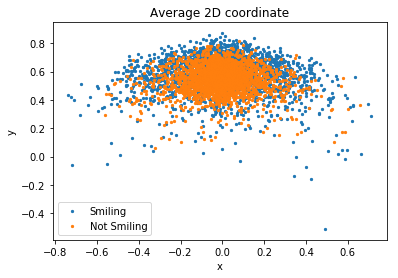

In [11]:
#3b.
plt.title('Average 2D coordinate')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xs, ys,s=5, label='Smiling')
plt.scatter(xns, yns,s=5, label='Not Smiling')
plt.legend()

In [7]:
#get avg coordinates of both smiling and non smiling together

#x needs to be 2 x n dataset, y needs to be smiling column
avgCoordTrain = avg(train_clean.as_matrix())
Xtrain = []
ytrain = []
for entry in avgCoordTrain:
    Xtrain.append(entry[0])
    ytrain.append(entry[1])
    
avgCoordTest = avg(test_clean.as_matrix())
Xtest = []
ytest = []
for entry in avgCoordTest:
    Xtest.append(entry[0])
    ytest.append(entry[1])

Xtrain = np.asarray(Xtrain).reshape(-1,1)
ytrain = np.asarray(ytrain).reshape(-1,1)
Xtest = np.asarray(Xtest).reshape(-1,1)
ytest = np.asarray(ytest).reshape(-1,1)

Xtrain = np.hstack((Xtrain, ytrain))
Xtest = np.hstack((Xtest, ytest))

print(Xtrain.shape)
print(Xtest.shape)

tgtTrain = train['smiling'].as_matrix() # Target vector
tgtTest = test['smiling'].as_matrix() # Target vector

C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


(4800, 2)
(1200, 2)


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [8]:
#3e.
depths=[2,8,20]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=2001)
    dt.fit(train_clean, tgtTrain)
    predict_train = dt.predict(X=train_clean)
    predict_test = dt.predict(X=test_clean)
    print('Classification accuracy on training set: {:.3f} with tree depth {}'.format(accuracy_score(tgtTrain,predict_train),depth))
    print('Classification accuracy on test set: {:.3f} with tree depth {}'.format(accuracy_score(tgtTest,predict_test),depth))

Classification accuracy on training set: 0.795 with tree depth 2
Classification accuracy on test set: 0.782 with tree depth 2
Classification accuracy on training set: 0.934 with tree depth 8
Classification accuracy on test set: 0.841 with tree depth 8
Classification accuracy on training set: 1.000 with tree depth 20
Classification accuracy on test set: 0.816 with tree depth 20


In [87]:
#3f
dtm = DecisionTreeClassifier(max_depth=8, random_state=2001)
dtm.fit(train_clean, tgtTrain)
importance = dtm.feature_importances_
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
top_3_idx = np.argsort(importance)[-3:]
top_3_values = [importance[i] for i in top_3_idx]
print(top_3_idx[::-1])
print(top_3_values[::-1])

#train_clean
x50 = train_clean['x50']
x50



[100  97  59]
[0.33040484928175073, 0.08995881431599788, 0.08831447209293988]


0      -0.183
1      -0.218
2      -0.228
3      -0.243
4      -0.165
5      -0.238
6      -0.251
7      -0.102
8      -0.180
9      -0.225
10     -0.209
11     -0.148
12     -0.218
13     -0.201
14     -0.266
15     -0.144
16     -0.279
17     -0.260
18     -0.208
19     -0.179
20     -0.220
21     -0.226
22     -0.170
23     -0.201
24     -0.250
25     -0.187
26     -0.196
27     -0.228
28     -0.150
29     -0.201
        ...  
4770   -0.172
4771   -0.191
4772   -0.200
4773   -0.191
4774   -0.251
4775   -0.142
4776   -0.212
4777   -0.159
4778   -0.205
4779   -0.208
4780   -0.284
4781   -0.295
4782   -0.179
4783   -0.150
4784   -0.176
4785   -0.203
4786   -0.192
4787   -0.106
4788   -0.189
4789   -0.189
4790   -0.059
4791   -0.207
4792   -0.262
4793   -0.177
4794   -0.122
4795   -0.214
4796   -0.131
4797   -0.193
4798   -0.173
4799   -0.197
Name: x50, Length: 4800, dtype: float64

# Question 4

In [12]:
evl_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
evl = pd.read_csv(evl_path, delimiter = ',')
evl.shape

(1000, 5)

In [13]:
evl.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [14]:
gt = evl['gt'] #separate ground truth labels from data set
evl_clean = evl.copy(deep=True)
evl_clean = evl.drop('gt', axis=1)
evl_clean.head(10)

,alg_1,alg_2,alg_3,alg_4
0,0.051302,0.000000,0.821882,0.705028
1,0.695441,1.000000,1.000000,0.741789
2,0.471121,0.913034,0.000000,1.000000
3,1.000000,1.000000,0.000000,1.000000
4,0.857339,0.000000,0.296797,0.809736
5,1.000000,0.000000,0.493186,0.769017
6,0.897370,1.000000,0.261861,0.987711
7,0.236050,1.000000,0.687067,0.826789
8,0.219094,0.131004,0.502369,0.712532
9,0.000000,1.000000,1.000000,0.407349


In [15]:
#for each algo go through each value and if its >=0.5 == 1 else 0. then compare accuracy
ev = evl_clean.as_matrix()
ev = np.where(ev >= 0.5, 1, 0)
ev

C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0, 0, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       ...,
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1]])

In [16]:
#make each column its own list to better separate algos
algs = np.transpose(ev)
alg1 = algs[0]
alg2 = algs[1]
alg3 = algs[2]
alg4 = algs[3]

print('Classification accuracy of alg1: {:.3f}'.format(accuracy_score(gt,alg1)))
print('Classification accuracy of alg2: {:.3f}'.format(accuracy_score(gt,alg2)))
print('Classification accuracy of alg3: {:.3f}'.format(accuracy_score(gt,alg3)))
print('Classification accuracy of alg4: {:.3f}'.format(accuracy_score(gt,alg4)))




Classification accuracy of alg1: 0.616
Classification accuracy of alg2: 0.550
Classification accuracy of alg3: 0.321
Classification accuracy of alg4: 0.329


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = np.transpose(evl_clean.as_matrix())
auc.shape
auc1 = roc_auc_score(gt,auc[0]) #or do i use alg1
auc2 = roc_auc_score(gt,auc[1])
auc3 = roc_auc_score(gt,auc[2])
auc4 = roc_auc_score(gt,auc[3])
print('Area under curve for alg1: {:.3f}'.format(auc1))
print('Area under curve for alg2: {:.3f}'.format(auc2))
print('Area under curve for alg3: {:.3f}'.format(auc3))
print('Area under curve for alg4: {:.3f}'.format(auc4))



Area under curve for alg1: 0.732
Area under curve for alg2: 0.632
Area under curve for alg3: 0.064
Area under curve for alg4: 0.847


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


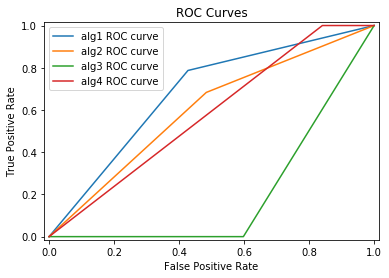

In [19]:
fpr1, tpr1, thresholds1 = roc_curve(gt, alg1)
plt.plot(fpr1, tpr1, label='alg1 ROC curve')

fpr2, tpr2, thresholds2 = roc_curve(gt, alg2)
plt.plot(fpr2, tpr2, label='alg2 ROC curve')

fpr3, tpr3, thresholds3 = roc_curve(gt, alg3)
plt.plot(fpr3, tpr3, label='alg3 ROC curve')

fpr4, tpr4, thresholds4 = roc_curve(gt, alg4)
plt.plot(fpr4, tpr4, label='alg4 ROC curve')

plt.xlim([-0.015, 1.015])
plt.ylim([-0.015, 1.015])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

